In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colors = {"DCT": "#ad116a",
               "IC/DCT": "#820434",
               "Endothelium": "#484d4a", 
               "PC": "#f00028",
               "Immune": "black",
               "Podo": "#6e640e", 
               "Stroma": "#63ad2d",
               "Stroma_2": "#147309",
               "PT": "#0a4082",
               "PT?": "#34a1eb", 
               "iPT/PEC": "#460a82",
               "TAL": "#8c13bf",
               "Injured TAL": "#6b0d75",
               "nan": "tab:gray"
         }

In [3]:
annotation_colors_disc = {"NA":"tab:gray",
                            "nan":"tab:gray",
                            "PT_S1":"#59a0f7",
                            "PT_S2":"#2456c9",
                            "PT_S3":"#0b0785",
                            "iPT":"#1fcff2",
                            "Prolif":"#0c054d",
                            "C_TAL":"#9835de",
                            "M_TAL":"#450175",
                            "DLOH":"#850596",
                            "IC_A":"#f518d4",
                            "IC_B":"#a10e72",
                            "DCT1":"#730233",
                            "PC":"#ad7483",
                            "CNT":"#633340",
                            "DCT/CNT/PC":"#b32230",
                            "DCT2":"#63211c",
                            "Plasma_Cells":"#eb917c",
                            "CD8T":"#cf553a",
                            "CD4T":"#942810",
                            "NK":"#a67a62",
                            "B_Cells":"#f57631",
                            "Mono":"#8f3b0e",
                            "Neutrophil":"#c2823e",
                            "Baso/Mast":"#75420b",
                            "Mac":"#d6a740",
                            "DC":"#7a6433",
                            "Endo_Peritubular":"#000000",
                            "Endo_Lymphatic":"#545454",
                            "Endo_GC":"#2e2e2e",
                            "Fibroblast":"#81f249",
                            "GS_Stromal":"#246603",
                            "Mes":"#0b7d0d",
                            "Podo":"#606326",
                            "PEC":"#387d6c",
                            "Podo/Mes":"#4a6628",
                            "Macula_Densa":"#154f4b",
                            "Neural_Cells":"#5d1e82",
                            "RBC":"#ff0000"}

In [4]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/postSCVI/7_13_23slide0_PostSCVI_4_30_scRNA_snRNA.h5ad")

In [5]:
print(adata)

AnnData object with n_obs × n_vars = 881205 × 975
    obs: 'sample', 'orig.ident', 'type', 'Idents', 'tech', 'Cluster_Idents', 'cellType_CosMx_1', 'percent_mt', 'leiden_1', 'leiden_3', 'x_slide_mm', 'y_slide_mm', 'orig_ident', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'probe-0', 'custom_probes-0', 'orig_probes-0', 'green_counts-0', 'blue_counts-0', 'red_counts-0', 'yellow_counts-0', 'n_cells-0', 'vst.mean-0-1', 'vst.variance-0-1', 'vst.variance.expected-0-1', 'vst.variance.standardized-0-1', 'vst.variable-0-1', 'vst.mean-1-1', 'vst.variance-1-1', 'vst.variance.expected-1-1', 'vst.variance.standardized-1-1', 'vst.variable-1-1', 'name-2-1', 'n_counts-1'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'tech_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [6]:
adata.obs["tech"].value_counts()

tech
cosmx     598595
SN_RNA    155647
SC_RNA    126963
Name: count, dtype: int64

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


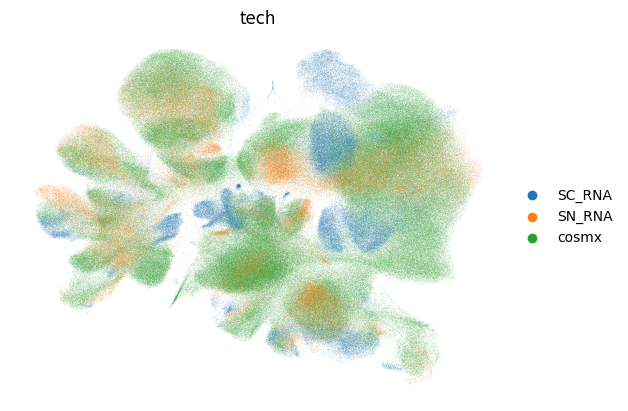

In [7]:
sc.pl.umap(adata, color = "tech",frameon = False)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


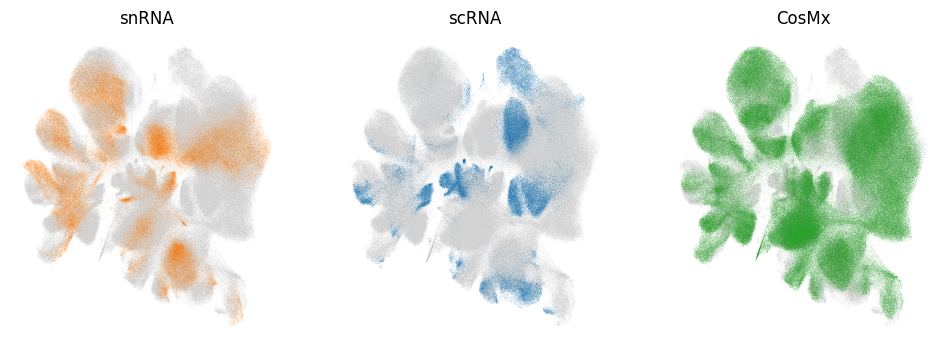

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sc.pl.umap(adata, color = "tech", groups = "SN_RNA",frameon = False, legend_loc = False, title = "snRNA", show = False, ax = axes[0])
sc.pl.umap(adata, color = "tech", groups = "SC_RNA",frameon = False, legend_loc = False, title = "scRNA", show = False, ax = axes[1])
sc.pl.umap(adata, color = "tech", groups = "cosmx",frameon = False, legend_loc = False, title = "CosMx", show = False, ax = axes[2])
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


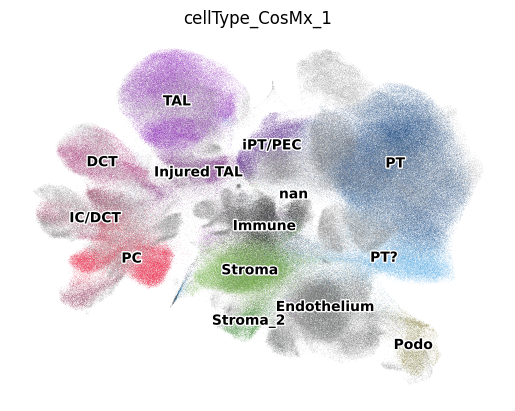

In [9]:
sc.pl.umap(adata, color = "cellType_CosMx_1",palette = colors, frameon = False, legend_loc = 'on data', legend_fontsize=10, legend_fontoutline=2,)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

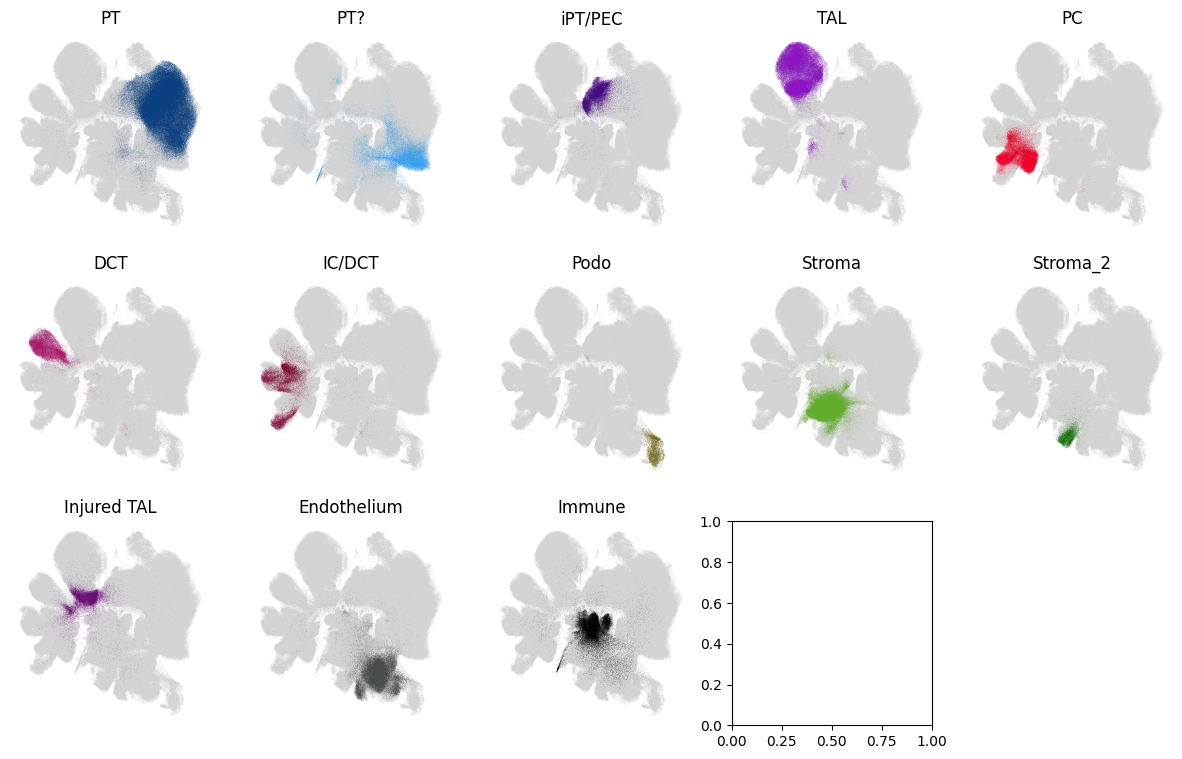

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PT",frameon = False, legend_loc = False, title = "PT", show = False, ax = axes[0,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PT?",frameon = False, legend_loc = False, title = "PT?", show = False, ax = axes[0,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "iPT/PEC",frameon = False, legend_loc = False, title = "iPT/PEC", show = False, ax = axes[0,2])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "TAL",frameon = False, legend_loc = False, title = "TAL", show = False, ax = axes[0,3])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "PC",frameon = False, legend_loc = False, title = "PC", show = False, ax = axes[0,4])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "DCT",frameon = False, legend_loc = False, title = "DCT", show = False, ax = axes[1,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "IC/DCT",frameon = False, legend_loc = False, title = "IC/DCT", show = False, ax = axes[1,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Podo",frameon = False, legend_loc = False, title = "Podo", show = False, ax = axes[1,2])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Stroma",frameon = False, legend_loc = False, title = "Stroma", show = False, ax = axes[1,3])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Stroma_2",frameon = False, legend_loc = False, title = "Stroma_2", show = False, ax = axes[1,4])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Injured TAL",frameon = False, legend_loc = False, title = "Injured TAL", show = False, ax = axes[2,0])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Endothelium",frameon = False, legend_loc = False, title = "Endothelium", show = False, ax = axes[2,1])
sc.pl.umap(adata, color = "cellType_CosMx_1", groups = "Immune",frameon = False, legend_loc = False, title = "Immune", show = False, ax = axes[2,2])
plt.axis('off')
plt.show()

In [11]:
print(adata.obs["Idents"].value_counts())

Idents
nan                 598595
PT_S1                37624
Endo_Peritubular     23744
PT_S3                20990
CD8T                 19910
C_TAL                19222
CD4T                 17815
NA                   17278
IC_A                 12885
iPT                  12141
NK                    9826
DCT1                  9512
B_Cells               9014
PC                    8527
Endo_GC               7442
Fibroblast            6887
Mono                  5994
Neutrophil            5477
CNT                   5044
Mac                   5012
M_TAL                 4896
DCT/CNT/PC            3915
PT_S2                 2831
Mes                   2546
PEC                   2363
IC_B                  2326
Podo                  1936
DCT2                  1284
GS_Stromal            1190
Macula_Densa          1047
DLOH                   915
Podo/Mes               890
Plasma_Cells           527
RBC                    435
Baso/Mast              419
Endo_Lymphatic         237
Prolif               

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


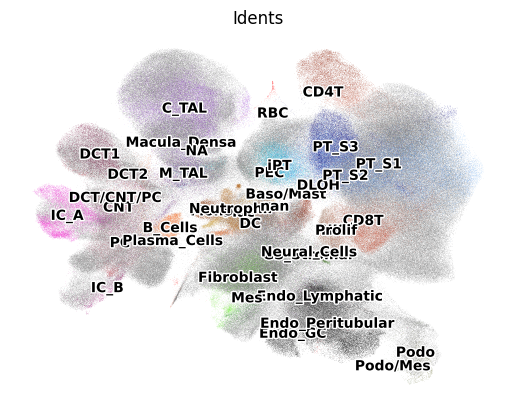

In [12]:
sc.pl.umap(adata, color = "Idents", frameon = False, legend_loc = 'on data',palette = annotation_colors_disc, legend_fontsize=10, legend_fontoutline=2,)

In [13]:
notAnnotated = ["NA"]
Proxtubule = ["PT_S1","PT_S2","PT_S3","iPT","Prolif"]
LOH = ["C_TAL","M_TAL","DLOH"]
distTubule = ["DCT1","DCT2","CNT","DCT/CNT/PC","IC_A","IC_B","PC"]
immune = ["Plasma_Cells","CD8T","CD4T","NK","B_Cells","Mono","Neutrophil","Baso/Mast","Mac","DC"]
endo = ["Endo_Peritubular","Endo_Lymphatic","Endo_GC"]
stroma = ["Fibroblast","GS_Stromal","Mes"]
specialized = ["Podo","PEC","Podo/Mes","Macula_Densa"]
other = ["Neural_Cells","RBC"]

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


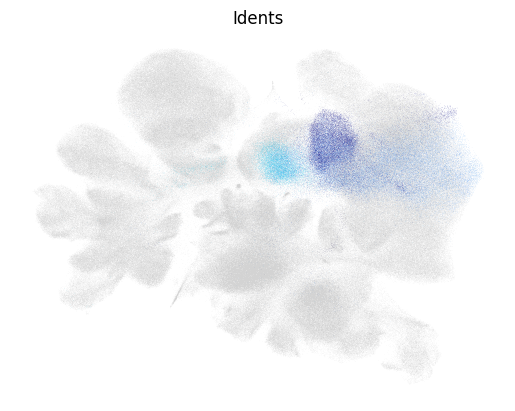

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


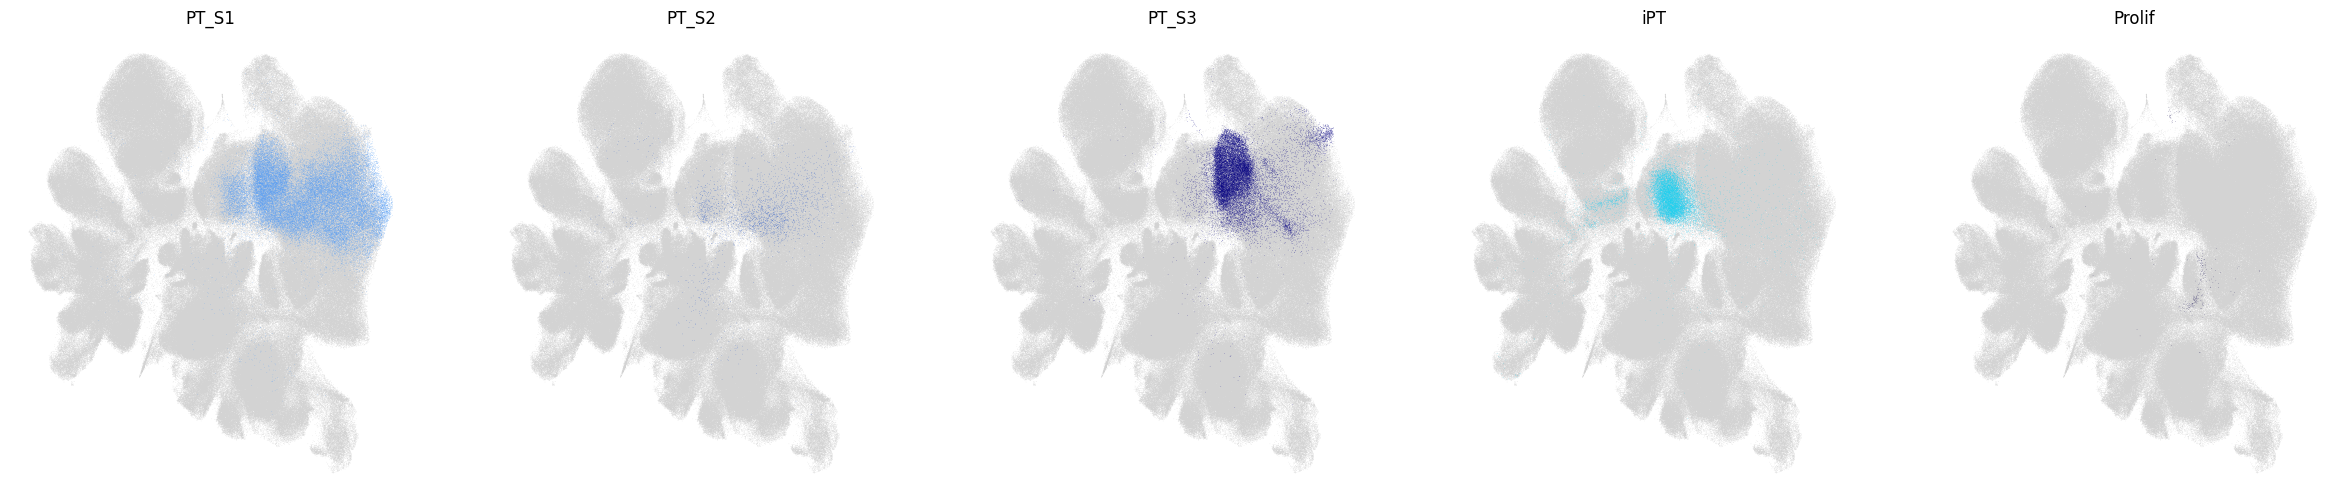

In [14]:
sc.pl.umap(adata, groups = Proxtubule, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(Proxtubule), figsize=(len(Proxtubule)*6,6))
for j,i in enumerate(Proxtubule):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j], size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


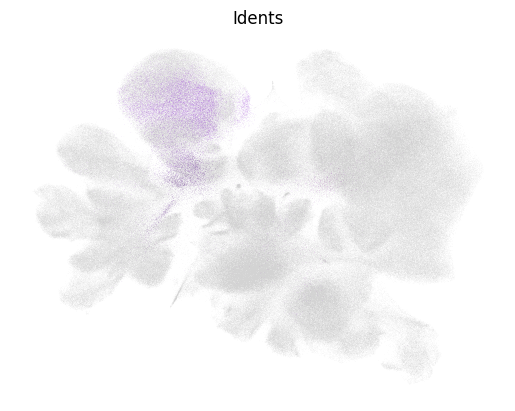

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


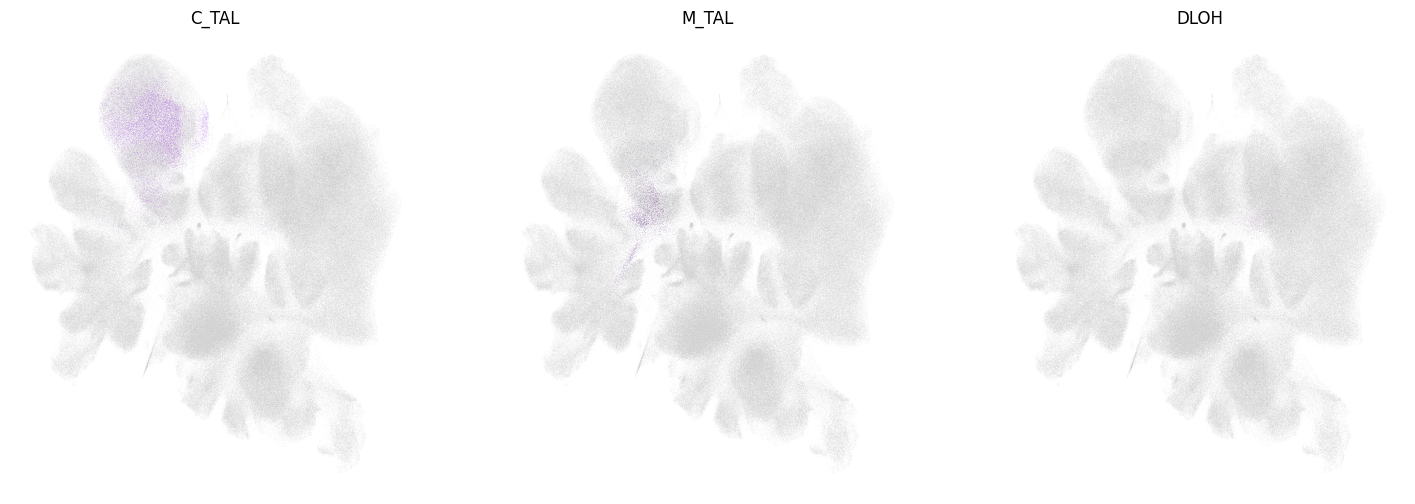

In [15]:
sc.pl.umap(adata, groups = LOH, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(LOH), figsize=(len(LOH)*6,6))
for j,i in enumerate(LOH):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


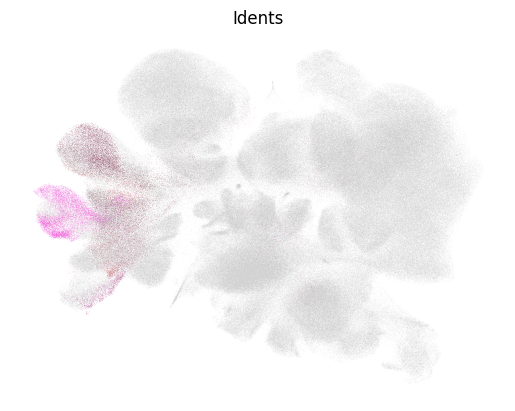

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

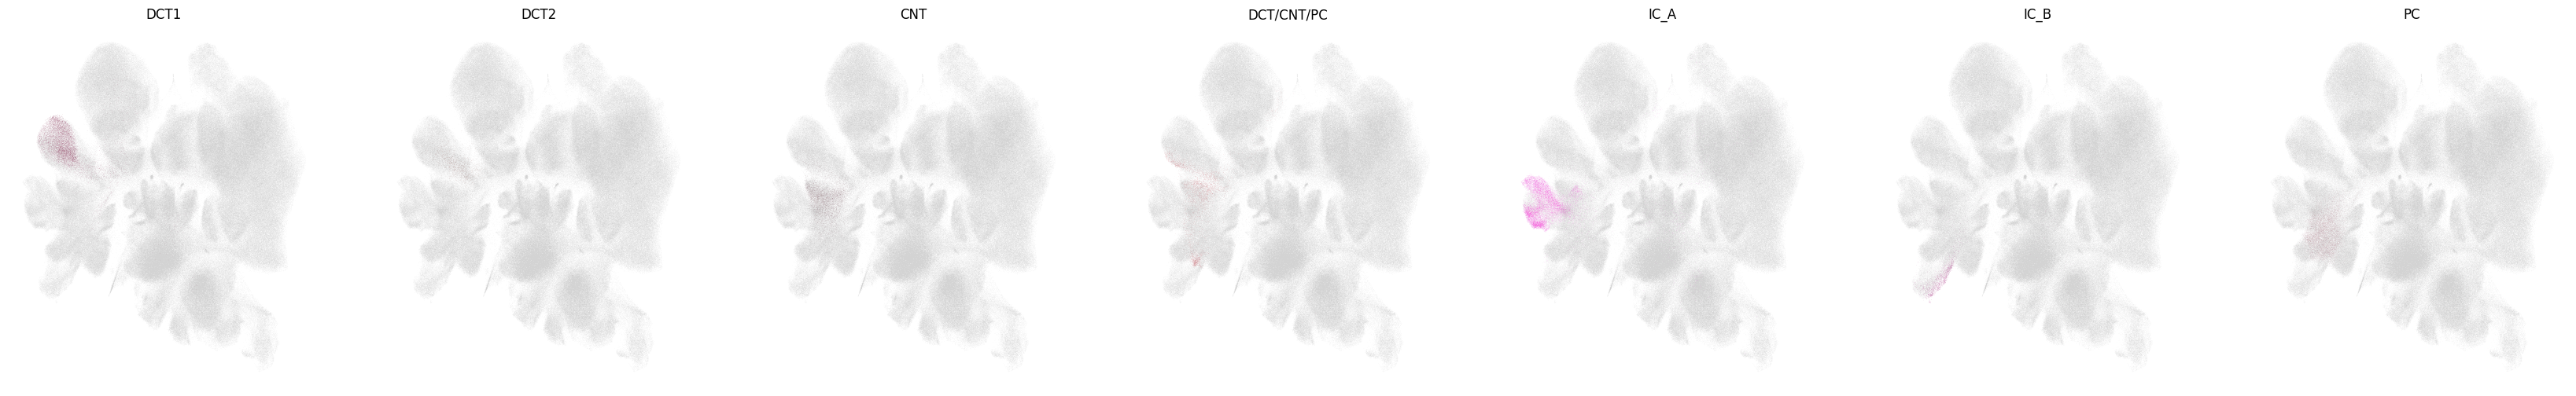

In [16]:
sc.pl.umap(adata, groups = distTubule, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(distTubule), figsize=(len(distTubule)*6,6))
for j,i in enumerate(distTubule):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


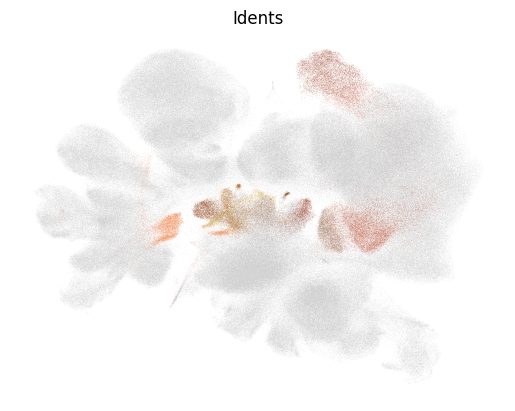

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

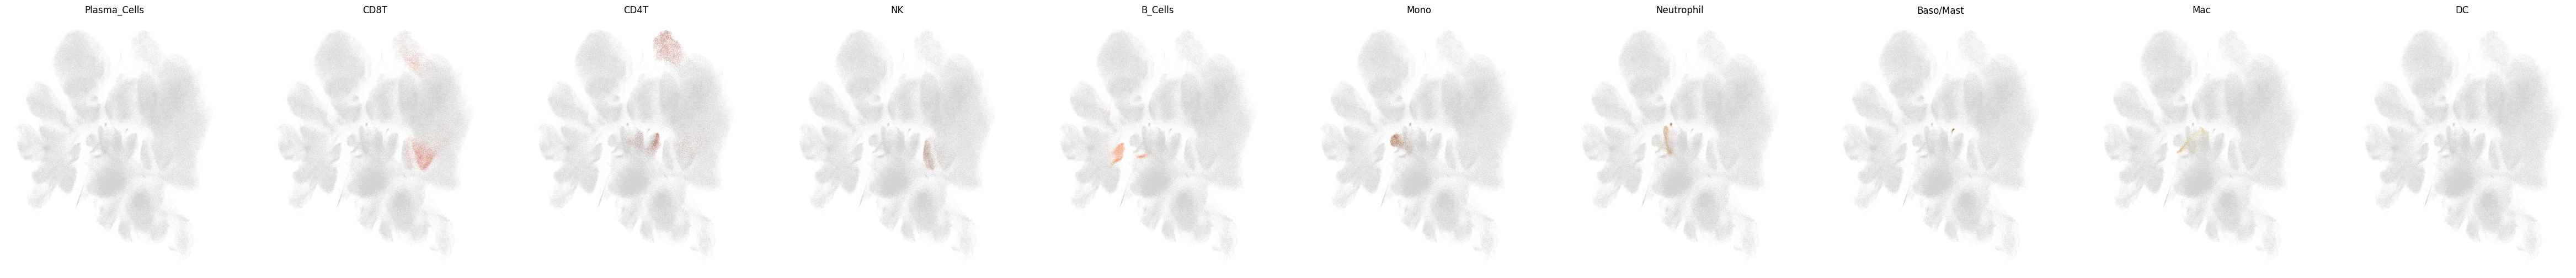

In [17]:
sc.pl.umap(adata, groups = immune, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(immune), figsize=(len(immune)*6,6))
for j,i in enumerate(immune):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j], size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


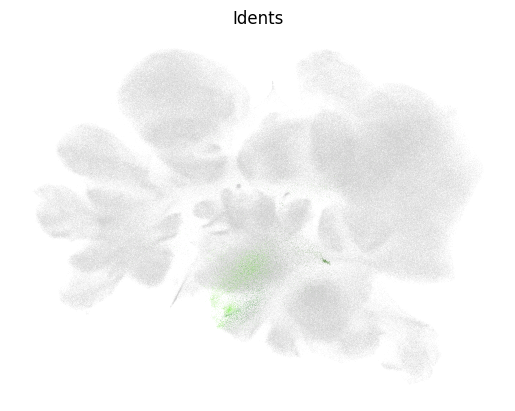

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


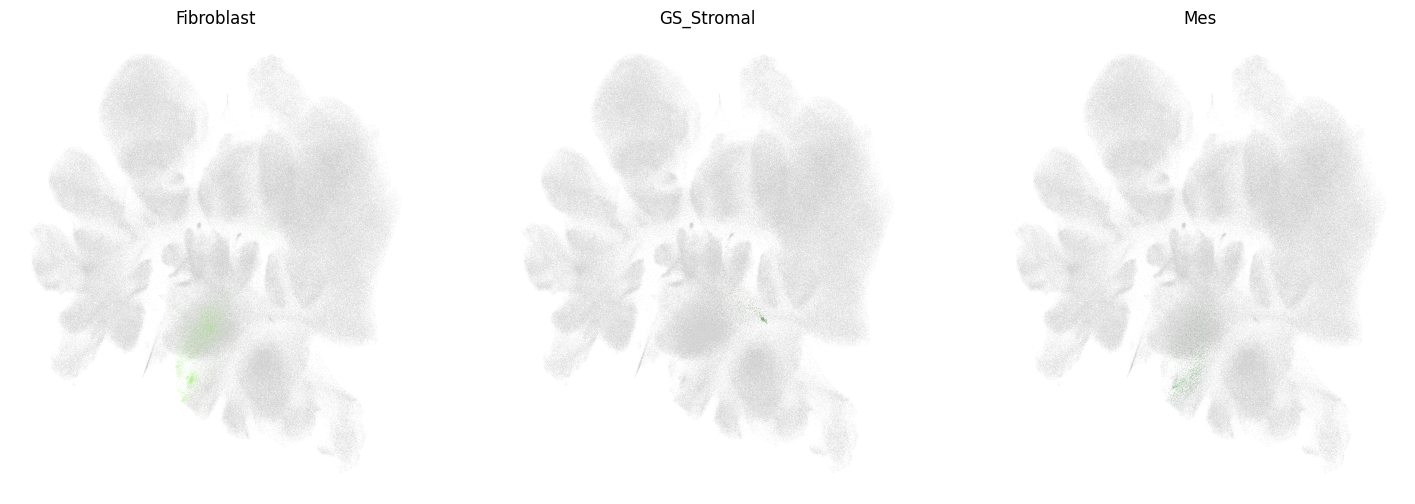

In [18]:
sc.pl.umap(adata, groups = stroma, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(stroma), figsize=(len(stroma)*6,6))
for j,i in enumerate(stroma):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


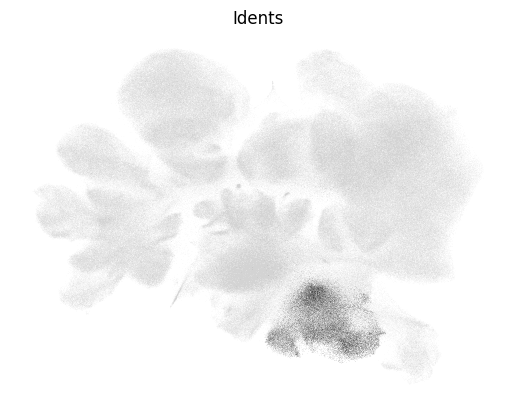

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


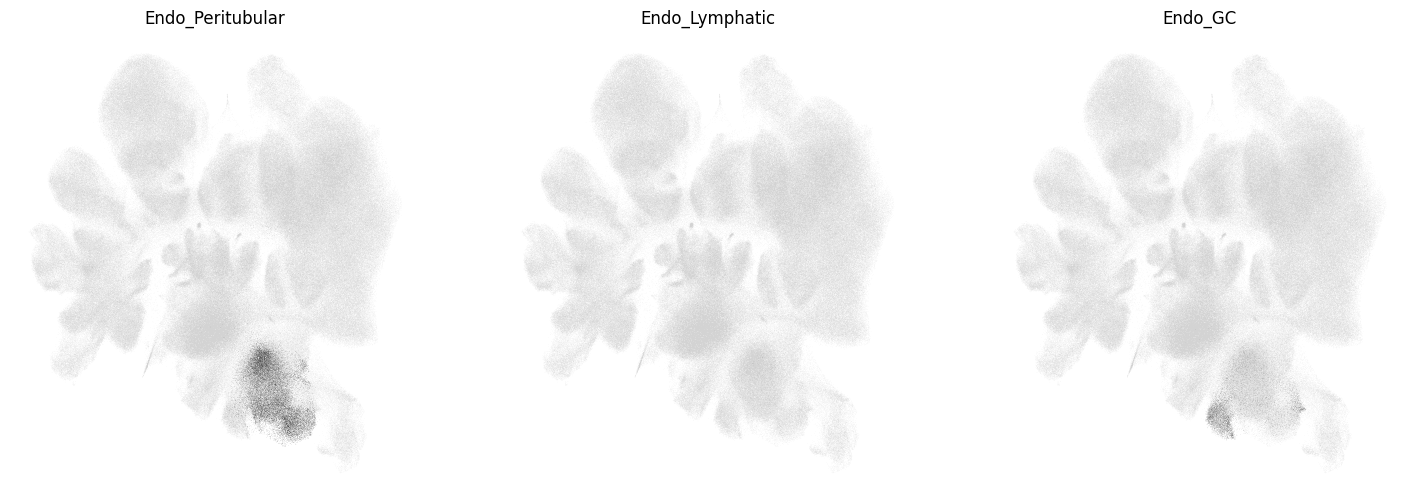

In [19]:
sc.pl.umap(adata, groups = endo, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(endo), figsize=(len(endo)*6,6))
for j,i in enumerate(endo):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


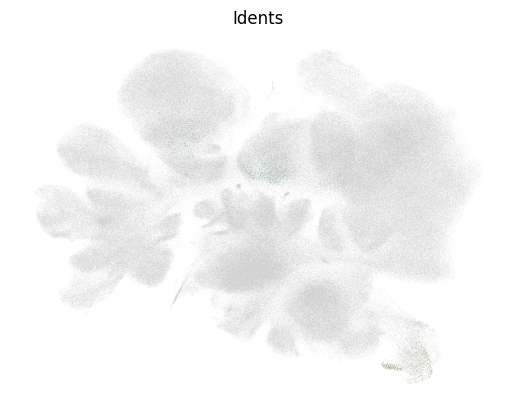

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


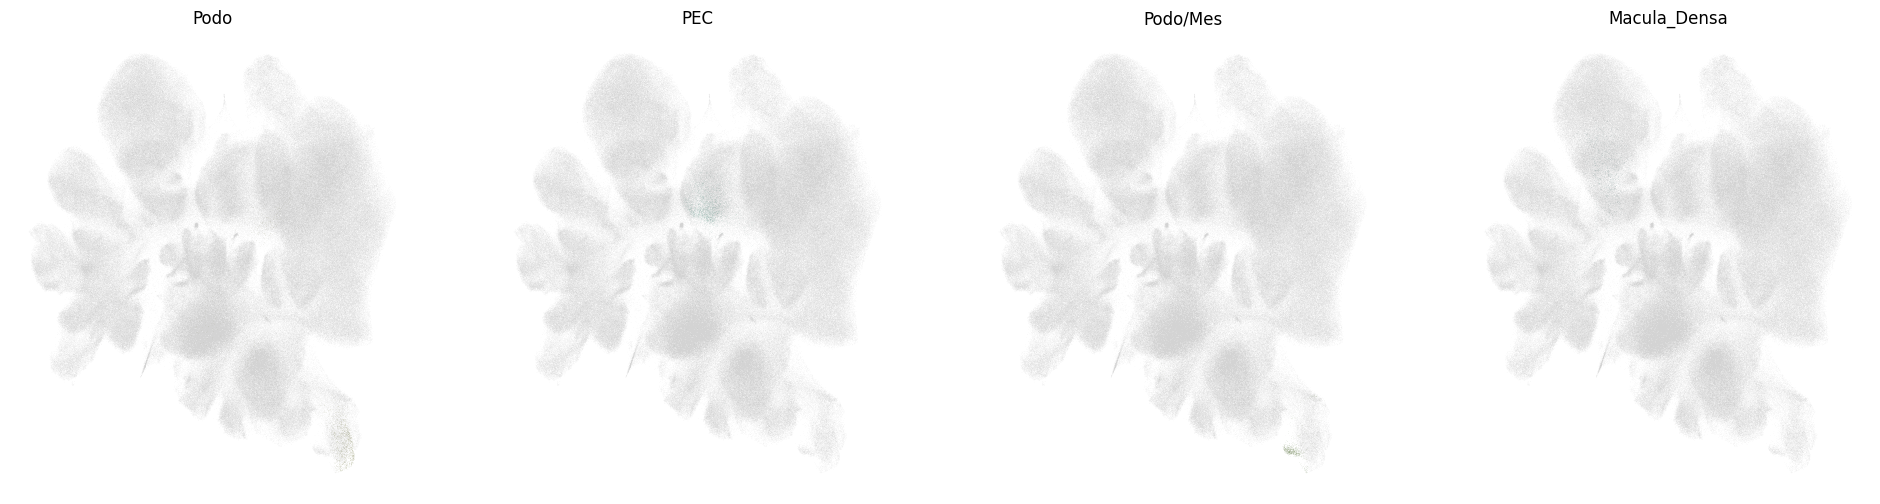

In [20]:
sc.pl.umap(adata, groups = specialized, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(specialized), figsize=(len(specialized)*6,6))
for j,i in enumerate(specialized):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


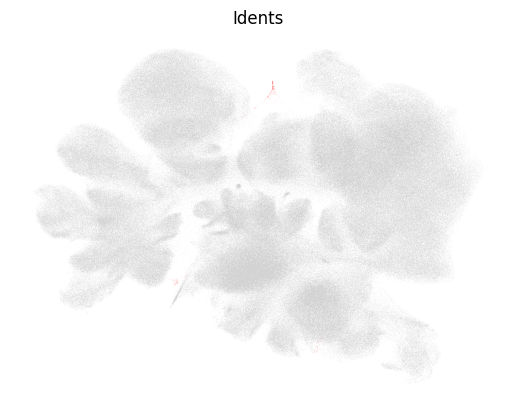

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


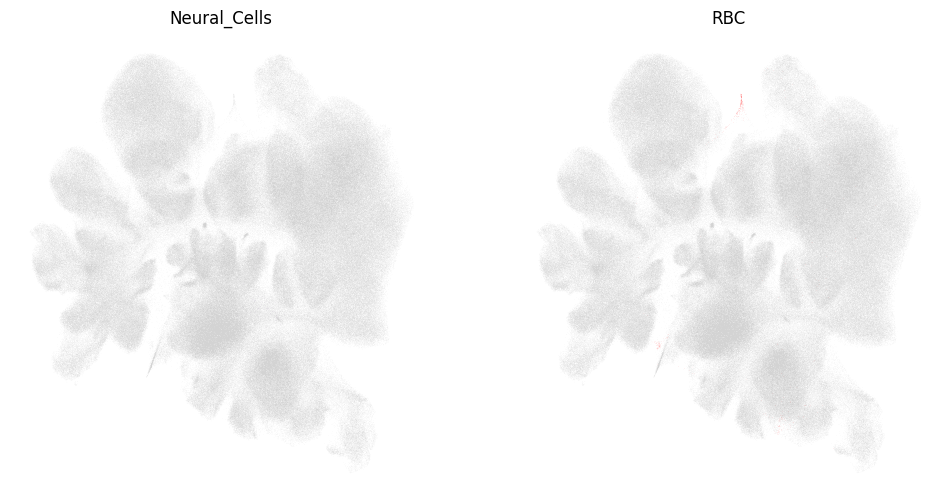

In [21]:
sc.pl.umap(adata, groups = other, color = "Idents", frameon = False, legend_loc = False, legend_fontsize=10, legend_fontoutline=2,size = 0.75)

fig, axes = plt.subplots(ncols=len(other), figsize=(len(other)*6,6))
for j,i in enumerate(other):
    sc.pl.umap(adata, color = "Idents", groups = i,frameon = False, legend_loc = False, title = i, show = False, ax = axes[j],size = 0.75)
    
plt.axis('off')
plt.show()